In [17]:
from urllib.request import urlopen

# открываю текст по url
html = urlopen("http://lib.ru/ADAMS/rhit1s.txt")

In [18]:
import re
import nltk
nltk.download('punkt')
import pymorphy2

# составляю словарь частот, предварительно приведя строчки в норм состояние
text = " ".join([re.sub('[^А-Яа-я]', " ", line.decode(html.headers.get_content_charset())) for line in html])
tokenizedWords = nltk.tokenize.word_tokenize(text)
freq = nltk.FreqDist(tokenizedWords)

# нормализованный словарь частот, кэш для оптимизации
# пришлось использовать nltk-шный морфологический анализатор,
# потому что нормально выкачивать txt из интернета можно только на англе
dictCache = {}
morph = pymorphy2.MorphAnalyzer()
def norm(word):
    if word in dictCache:
        return dictCache[word]
    dictCache[word] =  morph.parse(word)[0].normal_form
    return dictCache[word]

freq_norm = nltk.FreqDist([norm(word) for word in tokenizedWords])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krendeleno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
import math
from matplotlib import pyplot as pp

def graph(freq_list):
    pp.plot([math.log(i) for i in range(1, len(freq_list) + 1)], [math.log(freq_list[i]) for i in freq_list], '.')

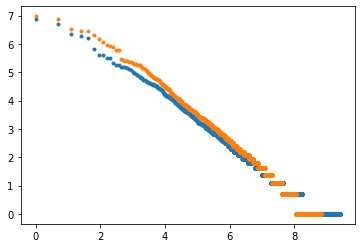

In [20]:
# рисую графики, решила что лучше на одном рисунке чтобы заметнее различие
graph(freq)
graph(freq_norm)

